# Lecture 23 - Part 1: DBSCAN continued & Hierarchical Clustering

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

---

# Density-based Spatial Clustering of Applications with Noise (DBSCAN)

In density-based clustering, a cluster is formed if there is a *sufficient* amount of neighboring points (density). In DBSCAN, each point is marked as one of three categories: 

* a **core point**, which is surrounded by a certain number of neighboring points in a given radius; 

* a **border point**, which is not surrounded by the same amount of neighboring points but is within a radius of a core point; and 

* a **noise point**, which is any other point that does not fall into the other two categories. 

With these markings, the DBSCAN algorithm forms clusters for groups of core points and assigns the border points to the cluster with their respective core point. So **there will be as many clusters as there are core points**.

![DBSCAN with 4 neighbors](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1280px-DBSCAN-Illustration.svg.png)

The parameters are: 

1. *MinPts*: the value for the minimum number of neighboring points, this will determine the number of points a core point must have in order to be marked as a core point; 

2. $\epsilon$: the radius parameter determines a fixed radius region in which neighboring points must *live on* in order to be marked as a core point or border point.

3. Distance metric: the distance metric used to compute distances and neighbors.

## Discussions

* DBSCAN has the advantage over both k-means and GMM in which it **finds clusters without needing to define the number of clusters a priori**. 

* DBSCAN has the advantage over k-means as it is able to find groups with different number of points (different densities) and without making explicit assumptions about cluster shape. 

* DBSCAN has the advantage over distribution-based clustering (with for example Gaussian Mixture Models or GMM) because it is of much lower computational complexity, in the order of $O(N\log(N))$. 

* Moreover, DBSCAN is able to mark points as noise points, making it robust against outliers for subsequent classification task.

* As with any algorithm that uses distances, DBSCAN will too be heavily affected by the curse of dimensionality. DBSCAN will also have trouble finding clusters with different densities (number of points).

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
# DBSCAN?

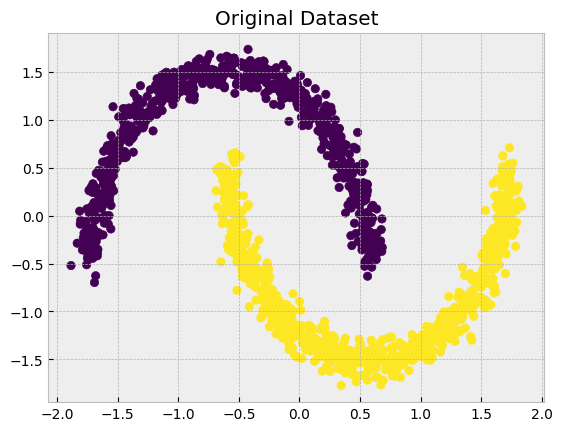

In [5]:
from sklearn.datasets import make_moons

# Dataset
dataset, true_labels = make_moons(n_samples=1500, noise=.05)

# Feature scaling
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

plt.scatter(dataset[:,0],dataset[:,1], c=true_labels); plt.title('Original Dataset');

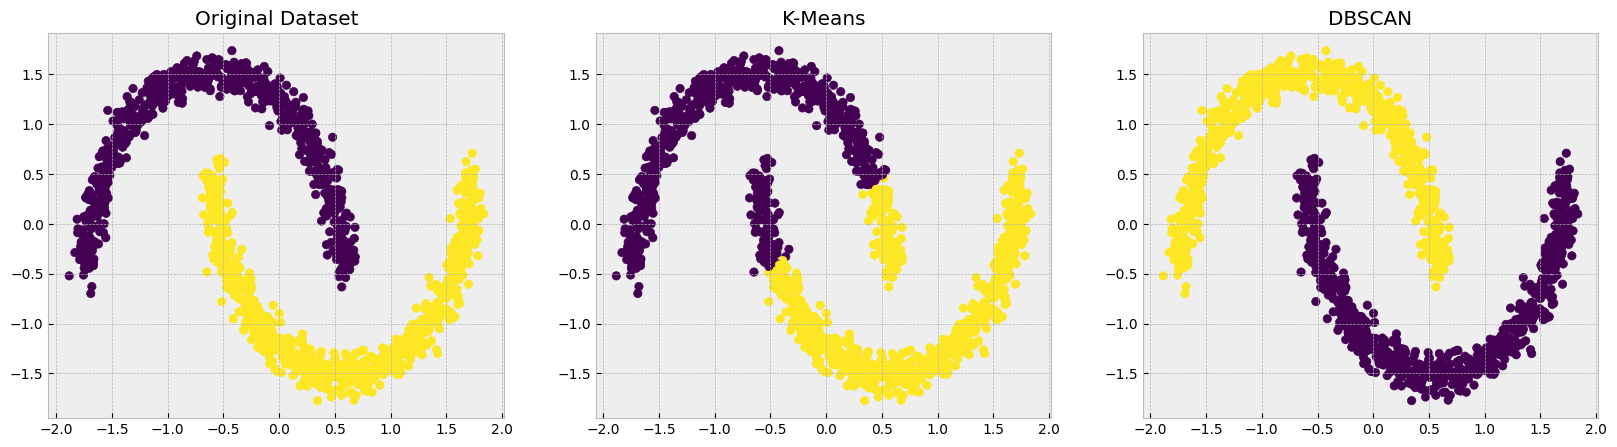

In [6]:
# K-Means
kmeans = KMeans(n_clusters=2, n_init='auto')
labels_kmeans = kmeans.fit_predict(dataset)

#DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(dataset[:,0],dataset[:,1], c=true_labels); plt.title('Original Dataset')
plt.subplot(1,3,2)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_kmeans); plt.title('K-Means')
plt.subplot(1,3,3)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); plt.title('DBSCAN');

In [7]:
dbscan.core_sample_indices_

array([   0,    1,    2, ..., 1497, 1498, 1499], dtype=int64)

In [8]:
len(dbscan.core_sample_indices_)

1498

In [9]:
dbscan.components_.shape

(1498, 2)

In [10]:
dbscan.components_

array([[ 0.83562416, -1.36484374],
       [ 1.77722173,  0.13061185],
       [-0.22264556, -1.00797752],
       ...,
       [ 0.57941694, -0.38642044],
       [-1.2720508 ,  1.01723268],
       [ 0.59397726,  0.08503041]])

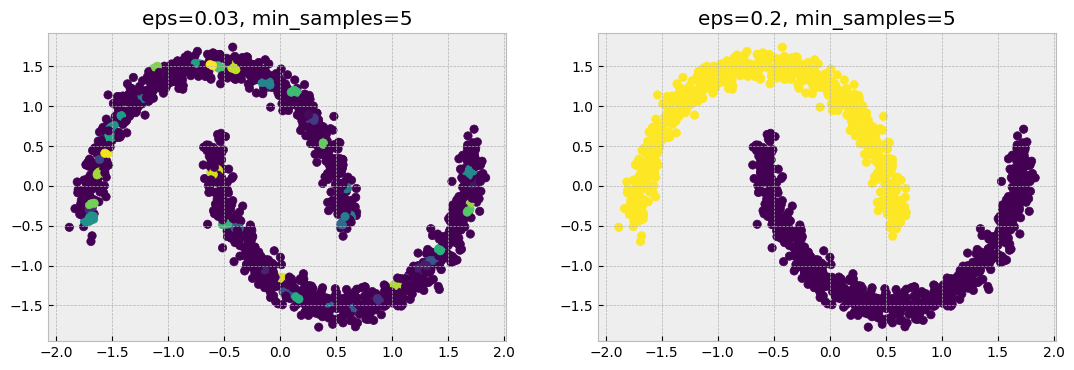

In [11]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
dbscan = DBSCAN(eps=0.03, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); 
plt.title('eps=0.03, min_samples=5')

plt.subplot(1,2,2)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); 
plt.title('eps=0.2, min_samples=5');

---

# Hierarchical Clustering

We will now take a look at an alternative approach of **prototype-based clustering**: **hierarchical clustering**. One advantage of the hierarchical clustering algorithm is that it allows us to plot **dendrograms** (visualizations of a binary hierarchical clustering), which can help with the interpretation of the results by creating meaningful taxonomies. Another advantage of this hierarchical approach is that we do not need to specify the number of clusters upfront. 

The two main approaches to hierarchical clustering are **agglomerative** and **divisive** hierarchical clustering. 

* In **divisive hierarchical clustering**, we start with one cluster that encompasses the complete dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one example. 

* In **agglomerative hierarchical clustering**, we start with each example as an individual cluster and merge the closest pairs of clusters until only one cluster remains.

## Agglomerative Hierarchical Clustering

The two standard algorithms for agglomerative hierarchical clustering are **single linkage** and **complete linkage**. 

* Using single linkage, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest. 

* The complete linkage approach is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge.

Let's illustrate it with an example:

In [12]:
import pandas as pd
np.random.seed(123) 

variables = ['X', 'Y', 'Z'] 
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] 

X = np.random.random_sample([5, 3])*10 

df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Performing Hierarchical Clustering on a Distance Matrix

In [14]:
from scipy.spatial.distance import pdist, squareform 

dist_matrix = pdist(df, metric='euclidean')

row_dist = pd.DataFrame(squareform(dist_matrix), 
                        columns=labels, index=labels) 

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [15]:
from scipy.cluster.hierarchy import linkage

linkage?

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1-D condensed distance matrix
or a 2-D array of observation vectors.

If y is a 1-D condensed distance matrix,
then y must be a :math:`\binom{n}{2}` sized
vector, where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to comp

In [16]:
row_clusters = linkage(dist_matrix, method='complete')

row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [17]:
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
             index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Now that we have computed the **linkage matrix**, we can visualize the results in the form of a **dendrogram**:

In [18]:
from scipy.cluster.hierarchy import dendrogram

# dendrogram?

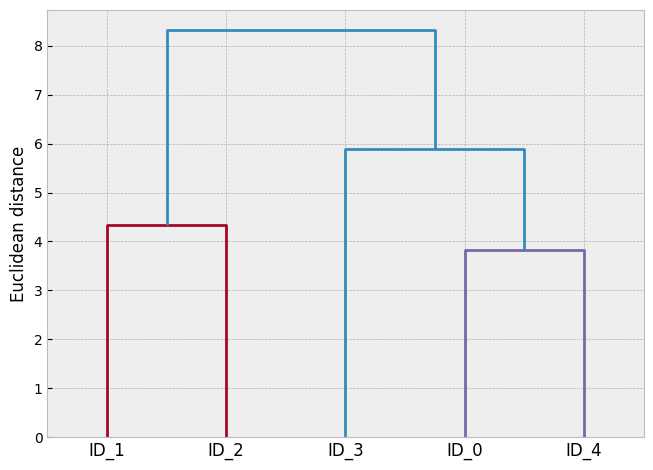

In [19]:
row_dendr=dendrogram(row_clusters, labels=labels)
plt.tight_layout() 
plt.ylabel('Euclidean distance');

## Applying agglomerative clustering via ```scikit-learn```

The ```AgglomerativeClustering``` implementation in ```scikit-learn``` allows us to choose the number of clusters that we want to return. This is useful if we want to prune the hierarchical cluster tree. By setting the ```n_cluster``` parameter to 3, we will now cluster the input examples into three groups using the same complete linkage approach based on the Euclidean distance metric, as before:

In [20]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering?

In [21]:
ac = AgglomerativeClustering(n_clusters=3,
                            metric='euclidean',
                            linkage='complete',
                            compute_distances=True)

labels = ac.fit_predict(X)
labels

array([1, 0, 0, 2, 1], dtype=int64)

In [22]:
ac.children_

array([[0, 4],
       [1, 2],
       [3, 5],
       [6, 7]])

In [23]:
ac.distances_

array([3.83539555, 4.34707339, 5.89988504, 8.31659367])

In [24]:
def plot_dendrogram(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

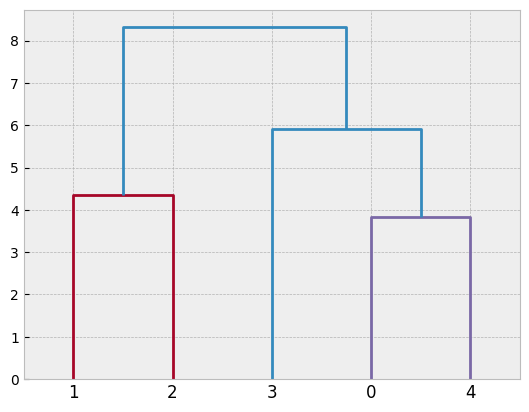

In [25]:
plot_dendrogram(ac)

In [26]:
ac = AgglomerativeClustering(n_clusters=2,
                            metric='euclidean',
                            linkage='complete',
                            compute_distances=True)

labels = ac.fit_predict(X)
labels


array([0, 1, 1, 0, 0], dtype=int64)

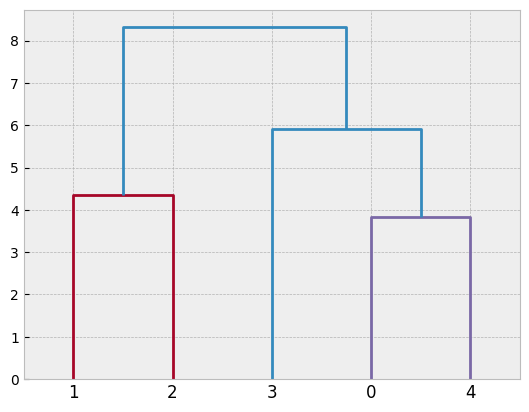

In [27]:
plot_dendrogram(ac)

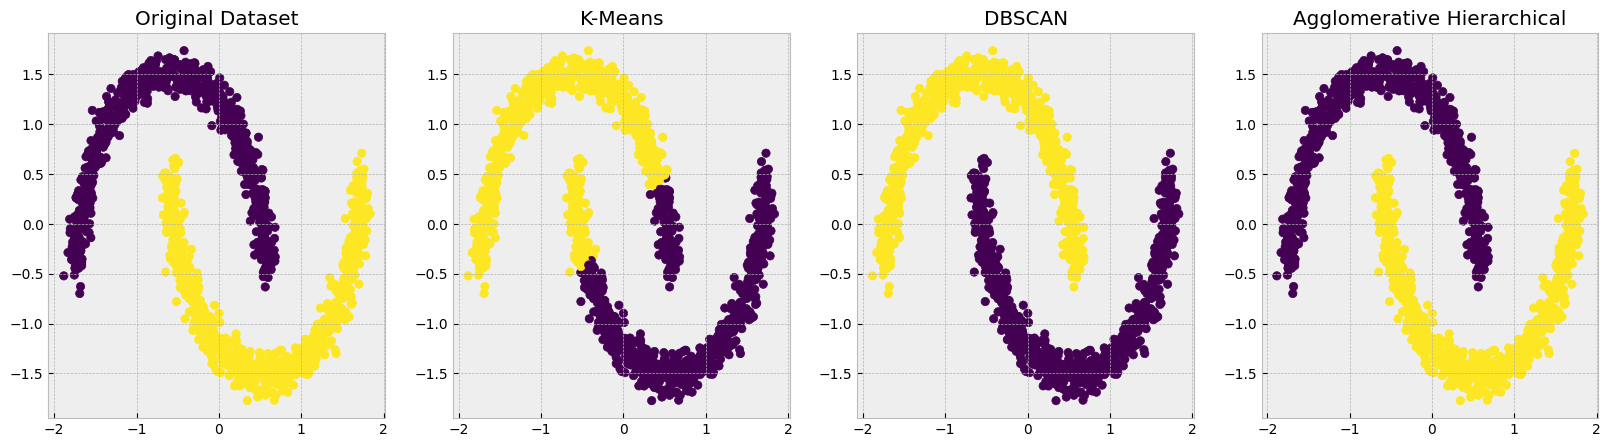

In [28]:
# K-Means
kmeans = KMeans(n_clusters=2, n_init='auto')
labels_kmeans = kmeans.fit_predict(dataset)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)

# Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean',
                            linkage='single', compute_distances=True)
labels_ac = ac.fit_predict(dataset)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.scatter(dataset[:,0],dataset[:,1], c=true_labels); plt.title('Original Dataset')
plt.subplot(1,4,2)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_kmeans); plt.title('K-Means')
plt.subplot(1,4,3)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); plt.title('DBSCAN')
plt.subplot(1,4,4)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_ac); plt.title('Agglomerative Hierarchical');

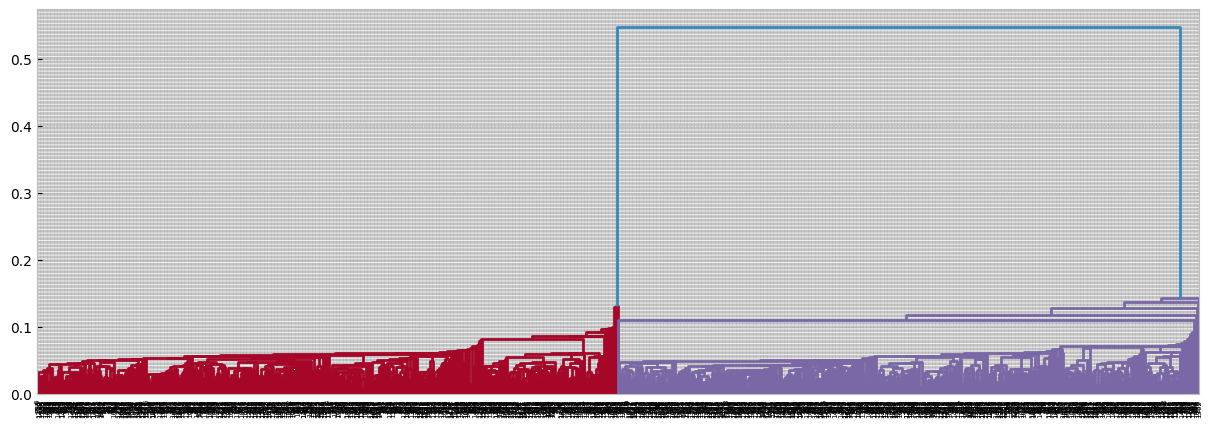

In [29]:
plt.figure(figsize=(15,5))
plot_dendrogram(ac)

---

Nice, let’s walk through the **whole code step-by-step** in baby language 😊
I’ll group a few very related lines together so it doesn’t become messy.

---

## 🌟 Setup & Imports

```python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
```

* `import numpy as np` → load NumPy and call it `np` (for arrays, math).
* `import matplotlib.pyplot as plt` → load plotting library as `plt`.
* `%matplotlib inline` → Jupyter magic: show plots **inside** the notebook.
* `plt.style.use('bmh')` → choose a nice plotting style.

The next imports are ML tools (even if not all are used later):

* `LogisticRegression`, `Pipeline`, `KMeans`, `train_test_split`, `GridSearchCV`, `StandardScaler` → models, pipelines, data split, and scaler from scikit-learn.

---

## 🌀 DBSCAN + K-Means on the moons data

```python
from sklearn.cluster import DBSCAN
# DBSCAN?
from sklearn.datasets import make_moons
```

* `from sklearn.cluster import DBSCAN` → import DBSCAN algorithm.
* `from sklearn.datasets import make_moons` → function to create two-moon dataset.

---

### 1. Make the dataset

```python
# Dataset
dataset, true_labels = make_moons(n_samples=1500, noise=.05)
```

* Comment for humans: `# Dataset`.
* `make_moons(...)` creates 1500 2D points shaped like two moons.

  * `noise=.05` adds a bit of randomness.
* `dataset` → the coordinates of all points (shape ~ (1500, 2)).
* `true_labels` → 0 or 1 for each point (which moon it belongs to).

---

### 2. Scale the features

```python
# Feature scaling
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)
```

* `scaler = StandardScaler()` → create a scaler object.
* `scaler.fit_transform(dataset)`:

  * `fit`: compute mean and std of each column.
  * `transform`: subtract mean, divide by std → scaled data.
* Result replaces `dataset`.

---

### 3. Plot original data

```python
plt.scatter(dataset[:,0],dataset[:,1], c=true_labels); plt.title('Original Dataset');
```

* `dataset[:,0]` → all rows, column 0 → x-axis.
* `dataset[:,1]` → all rows, column 1 → y-axis.
* `plt.scatter(...)` → scatter plot of points.
* `c=true_labels` → color by real moon labels.
* `plt.title('Original Dataset')` → add title.
* `;` just lets you put two commands on one line.

---

### 4. K-Means clustering

```python
# K-Means
kmeans = KMeans(n_clusters=2, n_init='auto')
labels_kmeans = kmeans.fit_predict(dataset)
```

* Comment: `# K-Means`.
* `KMeans(n_clusters=2, n_init='auto')`:

  * ask K-Means to find **2 clusters**.
  * `n_init='auto'` → scikit decides how many initializations.
* `kmeans.fit_predict(dataset)`:

  * `fit`: learn cluster centers.
  * `predict`: assign each point to one center.
* `labels_kmeans` → cluster label (0/1) for each point from K-Means.

---

### 5. DBSCAN clustering

```python
#DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)
```

* Comment: `#DBSCAN`.
* `DBSCAN(eps=0.2, min_samples=5)`:

  * `eps=0.2` → radius of neighborhood to look for neighbors.
  * `min_samples=5` → need ≥5 points in that radius to be a **core point**.
* `dbscan.fit_predict(dataset)`:

  * finds core, border, noise points.
  * assigns cluster labels.
* `labels_dbscan` → labels for each point (0,1,… or -1 for noise).

---

### 6. Compare all three visually

```python
plt.figure(figsize=(20,5))
```

* Make a big figure canvas, width 20, height 5 (inches).

```python
plt.subplot(1,3,1)
plt.scatter(dataset[:,0],dataset[:,1], c=true_labels); plt.title('Original Dataset')
```

* `subplot(1,3,1)` → grid of 1 row, 3 columns, pick position 1 (left).
* Plot original data colored by `true_labels`.

```python
plt.subplot(1,3,2)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_kmeans); plt.title('K-Means')
```

* Middle panel, colored by K-Means labels.

```python
plt.subplot(1,3,3)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); plt.title('DBSCAN');
```

* Right panel, colored by DBSCAN labels.

---

### 7. Look at DBSCAN internals

```python
dbscan.core_sample_indices_
```

* Shows an array of indices of **core points**.

```python
len(dbscan.core_sample_indices_)
```

* How many core points there are.

```python
dbscan.components_.shape
```

* Shape of array containing coordinates of all core points
  (rows = number of core points, columns = 2).

```python
dbscan.components_
```

* Print the actual coordinates of core points.

---

### 8. Effect of eps (small vs larger)

```python
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
dbscan = DBSCAN(eps=0.03, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); 
plt.title('eps=0.03, min_samples=5')
```

* New figure, 1 row, 2 columns.
* Left subplot.
* New DBSCAN with **tiny eps = 0.03**.
* Fit and plot: many points likely become noise.

```python
plt.subplot(1,2,2)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); 
plt.title('eps=0.2, min_samples=5');
```

* Right subplot.
* DBSCAN with **larger eps = 0.2**.
* Fit and plot: clusters are nicely formed.

---

## 🌲 Hierarchical Clustering Section

### 1. Make a small random dataset

```python
import pandas as pd
np.random.seed(123) 
```

* Import pandas as `pd` for tables.
* `np.random.seed(123)` → fix random numbers so results repeat.

```python
variables = ['X', 'Y', 'Z'] 
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] 
```

* Names for columns and row labels.

```python
X = np.random.random_sample([5, 3])*10 
```

* Create a 5×3 matrix of random numbers between 0 and 1, then `*10` → 0–10.

```python
df = pd.DataFrame(X, columns=variables, index=labels)
df
```

* Put the data in a DataFrame with given row/column names.
* Last line prints it.

---

### 2. Distance matrix

```python
from scipy.spatial.distance import pdist, squareform 
```

* Import functions to compute pairwise distances.

```python
dist_matrix = pdist(df, metric='euclidean')
```

* `pdist` → compute condensed distance vector (all pairwise distances)
  between rows of `df`.

```python
row_dist = pd.DataFrame(squareform(dist_matrix), 
                        columns=labels, index=labels) 

row_dist
```

* `squareform(dist_matrix)` → turn 1D distance vector into full square matrix.
* Wrap in DataFrame for nice display.
* Print it.

---

### 3. Linkage (build cluster tree)

```python
from scipy.cluster.hierarchy import linkage

linkage?
```

* Import `linkage` function for hierarchical clustering.
* `linkage?` in Jupyter shows documentation.

```python
row_clusters = linkage(dist_matrix, method='complete')
```

* Build hierarchical clusters using:

  * the previously computed distances
  * `method='complete'` → use complete linkage (max distance between cluster points).

```python
row_clusters
```

* Print the linkage matrix (each row: which clusters merged, at what distance).

```python
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
             index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])
```

* Wrap linkage matrix in a readable DataFrame:

  * columns explain what each number is.
  * index named like `cluster 1`, `cluster 2`, etc.

---

### 4. Dendrogram

```python
from scipy.cluster.hierarchy import dendrogram
```

* Import function to draw dendrogram.

```python
# dendrogram?
row_dendr=dendrogram(row_clusters, labels=labels)
plt.tight_layout() 
plt.ylabel('Euclidean distance');
```

* `dendrogram(row_clusters, labels=labels)` → draw the tree using linkage matrix.
* Save handle in `row_dendr`.
* `plt.tight_layout()` → reduce overlaps.
* Label y-axis with “Euclidean distance”.

---

## 🧬 AgglomerativeClustering with scikit-learn

```python
from sklearn.cluster import AgglomerativeClustering
```

* Import the sklearn implementation.

```python
# AgglomerativeClustering?
ac = AgglomerativeClustering(n_clusters=3,
                            metric='euclidean',
                            linkage='complete',
                            compute_distances=True)
```

* `AgglomerativeClustering?` → show docstring.
* Create model `ac`:

  * `n_clusters=3` → cut the hierarchy to get 3 clusters.
  * `metric='euclidean'` → distance type.
  * `linkage='complete'` → same logic as before.
  * `compute_distances=True` → store distances for dendrogram plotting.

```python
labels = ac.fit_predict(X)
labels
```

* `fit_predict(X)` → group our 5 points into 3 clusters.
* Print cluster labels.

```python
ac.children_
ac.distances_
```

* `children_` → which clusters got merged at each step.
* `distances_` → distance at each merge.

---

### 5. Helper to plot dendrogram from sklearn model

```python
def plot_dendrogram(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)
```

What this function does:

* Takes sklearn model (`AgglomerativeClustering`) and converts its attributes into a **linkage matrix** like SciPy’s `linkage` output.
* `counts` array: number of original samples under each merge node.
* `for` loop:

  * goes through each merge (each internal node).
  * counts how many leaf samples are in the merged node.
* `linkage_matrix` = `children_` + `distances_` + `counts` stacked into columns.
* Finally calls `dendrogram(linkage_matrix)` to plot tree.

```python
plot_dendrogram(ac)
```

* Draw dendrogram for current `ac` model (3 clusters).

---

### 6. Repeat with n_clusters = 2

```python
ac = AgglomerativeClustering(n_clusters=2,
                            metric='euclidean',
                            linkage='complete',
                            compute_distances=True)

labels = ac.fit_predict(X)
labels

plot_dendrogram(ac)
```

* Create new model asking for 2 final clusters instead of 3.
* Fit on `X`, get labels, plot dendrogram again.

---

## 🌙 Compare methods on the moons dataset

Now we re-use the moon `dataset` again.

```python
# K-Means
kmeans = KMeans(n_clusters=2, n_init='auto')
labels_kmeans = kmeans.fit_predict(dataset)
```

* K-Means, 2 clusters, auto init.

```python
# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dataset)
```

* DBSCAN with earlier parameters.

```python
# Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean',
                            linkage='single', compute_distances=True)
labels_ac = ac.fit_predict(dataset)
```

* Agglomerative clustering on moon data:

  * 2 clusters.
  * `linkage='single'` (uses nearest point distance).
* `labels_ac` → cluster labels for each point.

---

### 7. Plot all 4 side-by-side

```python
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.scatter(dataset[:,0],dataset[:,1], c=true_labels); plt.title('Original Dataset')
```

* New figure, 1×4 grid.
* First panel: true labels.

```python
plt.subplot(1,4,2)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_kmeans); plt.title('K-Means')
```

* Second panel: K-Means clustering.

```python
plt.subplot(1,4,3)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_dbscan); plt.title('DBSCAN')
```

* Third panel: DBSCAN clustering.

```python
plt.subplot(1,4,4)
plt.scatter(dataset[:,0],dataset[:,1], c=labels_ac); plt.title('Agglomerative Hierarchical');
```

* Fourth panel: Agglomerative clustering result.

```python
plt.figure(figsize=(15,5))
plot_dendrogram(ac)
```

* New figure.
* Draw dendrogram for the `ac` model trained on the moons data.

----------------------------
